In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040567.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.380392  0.372549  0.368627  0.364706  0.368627  0.368627  0.372549   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.372549  0.372549  0.376471  ...  0.521569  0.505882  0.486275  0.466667   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.447059  0.427451  0.411765  0.396078    120.083333          62.25  

[1 rows x 4202 columns]
[120.08333333]  /  [62.25]
          0         1         2         3         4         5         6  \
0  0.380392  0.372549  0.368627  0.364706  0.368627  0.368627  0.372549   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.372549  0.372549  0.376471  ...  0.560784  0.541176  0.521569  0.505882   

       4194      4195      4196      4197      4198      4199  
0  0.486275  0.466667  0.447059  0.427451  0.411765  0.396078  

[1 rows x 4200 columns]


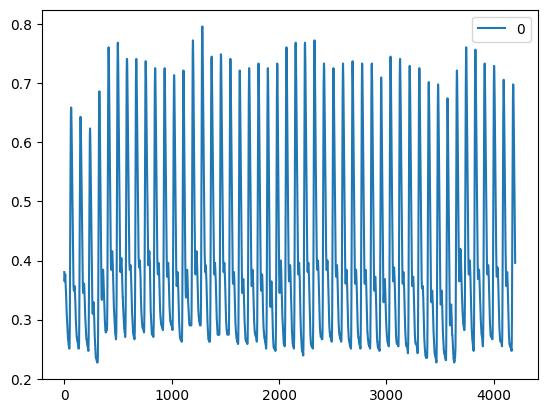

In [469]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [470]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

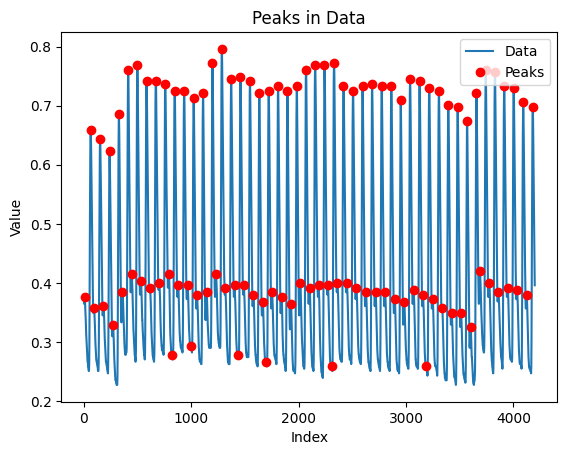

{'indices': array([   9,   64,   95,  151,  183,  240,  272,  327,  360,  413,  445,
        499,  531,  584,  616,  670,  702,  758,  791,  823,  846,  878,
        934,  966,  999, 1023, 1054, 1110, 1143, 1198, 1231, 1285, 1318,
       1372, 1404, 1437, 1459, 1490, 1547, 1579, 1634, 1666, 1696, 1721,
       1753, 1809, 1841, 1896, 1929, 1983, 2016, 2069, 2102, 2154, 2187,
       2241, 2273, 2308, 2330, 2361, 2418, 2450, 2507, 2538, 2596, 2628,
       2685, 2717, 2774, 2805, 2864, 2895, 2951, 2983, 3038, 3071, 3127,
       3158, 3189, 3216, 3248, 3306, 3337, 3394, 3425, 3481, 3513, 3569,
       3602, 3656, 3689, 3743, 3775, 3828, 3861, 3915, 3947, 4003, 4035,
       4092, 4124, 4180]), 'values': array([0.37647059, 0.65882353, 0.35686275, 0.64313725, 0.36078431,
       0.62352941, 0.32941176, 0.68627451, 0.38431373, 0.76078431,
       0.41568627, 0.76862745, 0.40392157, 0.74117647, 0.39215686,
       0.74117647, 0.4       , 0.7372549 , 0.41568627, 0.27843137,
       0.7254902 , 0.39607

In [471]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [472]:
def filter_peak_values(peak_values_df, threshold=0.3):
    """
    Filter peak_values_df to remove values below the specified threshold.

    Parameters:
    - peak_values_df: DataFrame containing peak values
    - threshold: float, minimum value required to keep a value (default: 1.5)

    Returns:
    - filtered_peak_values_df: DataFrame with values below threshold removed
    """
    filtered_df = peak_values_df[peak_values_df['Value'] >= threshold]
    return filtered_df


# Example usage
filtered_df = filter_peak_values(peak_values_df)
print(filtered_df)


     Index     Value
0        9  0.376471
1       64  0.658824
2       95  0.356863
3      151  0.643137
4      183  0.360784
..     ...       ...
97    4003  0.729412
98    4035  0.388235
99    4092  0.705882
100   4124  0.380392
101   4180  0.698039

[96 rows x 2 columns]


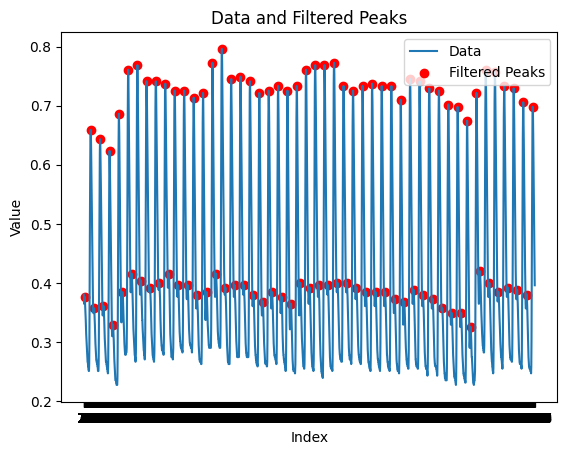

In [473]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()


In [477]:
def split_values_high_low(filtered_df, threshold=0.52):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[None, 0.6588235294117647, None, 0.6431372549019608, None, 0.6235294117647059, None, 0.6862745098039216, None, 0.7607843137254902, None, 0.7686274509803922, None, 0.7411764705882353, None, 0.7411764705882353, None, 0.7372549019607844, None, 0.7254901960784313, None, 0.7254901960784313, None, 0.7137254901960784, None, 0.7215686274509804, None, 0.7725490196078432, None, 0.796078431372549, None, 0.7450980392156863, None, 0.7490196078431373, None, 0.7411764705882353, None, 0.7215686274509804, None, 0.7254901960784313, None, 0.7333333333333333, None, 0.7254901960784313, None, 0.7333333333333333, None, 0.7607843137254902, None, 0.7686274509803922, None, 0.7686274509803922, None, 0.7725490196078432, None, 0.7333333333333333, None, 0.7254901960784313, None, 0.7333333333333333, None, 0.7372549019607844, None, 0.7333333333333333, None, 0.7333333333333333, None, 0.7098039215686275, None, 0.7450980392156863, None, 0.7411764705882353, None, 0.7294117647058823, None, 0.7254901960784313, None, 0.7019

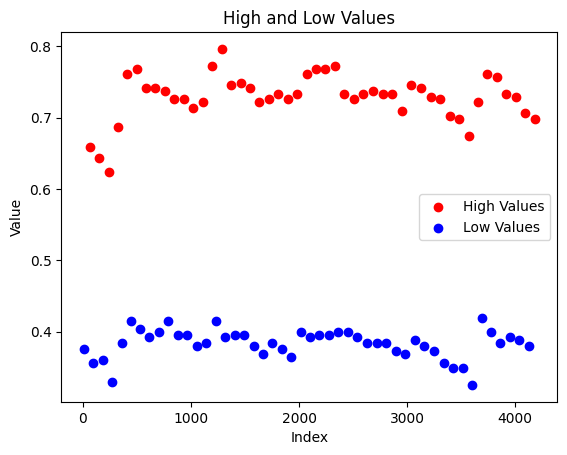

In [478]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [479]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7289215686274509
Average Low Value: 0.3838235294117647
